## Task: Predict Restaurant Ratings

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#reding the data set
df = pd.read_csv('Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
#display the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
#statistical summary
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### DATA PREPROCESSING

In [6]:
# Show unique value count for each column 
un_count = df.nunique()
print(un_count)

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


In [7]:
df = df.drop(columns=['Restaurant ID', 'Address', 'Longitude', 'Latitude','Has Table booking', 'Has Online delivery','Is delivering now','Locality Verbose', 'Currency', 'Country Code'])

In [8]:
# Check for missing values
df.isnull().sum()

Restaurant Name         0
City                    0
Locality                0
Cuisines                9
Average Cost for two    0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
##  there is no duplicate values and  null values
import warnings
warnings.filterwarnings("ignore")

In [10]:
# if there is any missing value then fill
df.fillna(method='ffill', inplace=True)

In [11]:
#checking for duplicate values
dup=df.duplicated()
print(dup.sum())  


4


In [12]:
df = df.drop_duplicates()


In [13]:
dup=df.duplicated()
print(dup.sum()) 


0


In [14]:
 print(df.shape)


(9547, 11)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9547 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9547 non-null   object 
 1   City                  9547 non-null   object 
 2   Locality              9547 non-null   object 
 3   Cuisines              9547 non-null   object 
 4   Average Cost for two  9547 non-null   int64  
 5   Switch to order menu  9547 non-null   object 
 6   Price range           9547 non-null   int64  
 7   Aggregate rating      9547 non-null   float64
 8   Rating color          9547 non-null   object 
 9   Rating text           9547 non-null   object 
 10  Votes                 9547 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 895.0+ KB


In [16]:
df = df.drop(columns=['Restaurant Name', ])

## label encoding


In [18]:
data = pd.DataFrame(df)

In [19]:
le = LabelEncoder()

In [20]:
le_col = df.select_dtypes(include=['object']).columns

In [22]:
for col in le_col:
    data[col]  = le.fit_transform(data[col])
print(data)    

      City  Locality  Cuisines  Average Cost for two  Switch to order menu  \
0       73       171       920                  1100                     0   
1       73       593      1111                  1200                     0   
2       75       308      1671                  4000                     0   
3       75       862      1126                  1500                     0   
4       75       862      1122                  1500                     0   
...    ...       ...       ...                   ...                   ...   
9546   140       517      1813                    80                     0   
9547   140       552      1824                   105                     0   
9548   140       554      1110                   170                     0   
9549   140       554      1657                   120                     0   
9550   140       670       331                    55                     0   

      Price range  Aggregate rating  Rating color  Rating text 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9547 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9547 non-null   int32  
 1   Locality              9547 non-null   int32  
 2   Cuisines              9547 non-null   int32  
 3   Average Cost for two  9547 non-null   int64  
 4   Switch to order menu  9547 non-null   int32  
 5   Price range           9547 non-null   int64  
 6   Aggregate rating      9547 non-null   float64
 7   Rating color          9547 non-null   int32  
 8   Rating text           9547 non-null   int32  
 9   Votes                 9547 non-null   int64  
dtypes: float64(1), int32(6), int64(3)
memory usage: 596.7 KB


In [41]:
#showing the first 5 rows
print(data.head())

   City  Locality  Cuisines  Average Cost for two  Switch to order menu  \
0    73       171       920                  1100                     0   
1    73       593      1111                  1200                     0   
2    75       308      1671                  4000                     0   
3    75       862      1126                  1500                     0   
4    75       862      1122                  1500                     0   

   Price range  Aggregate rating  Rating color  Rating text  Votes  
0            3               4.8             0            1    314  
1            3               4.5             0            1    591  
2            4               4.4             1            5    270  
3            4               4.9             0            1    365  
4            4               4.8             0            1    229  


## Splitting the Feature and Target
###

In [45]:
x = data.drop(columns=['Aggregate rating'])
y = data['Aggregate rating']

#### Splitting the data into Test and Train

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [51]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(9547, 9)
(7637, 9)
(1910, 9)


#### Model Training 
##### Linear Regression

In [54]:
# Train the model
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [56]:
y1_pred = model_lnr.predict(x_test)

#### Evaluating the model

In [59]:
mse = mean_squared_error(y_test, y1_pred)
mae = mean_absolute_error(y_test, y1_pred)
r2 = r2_score(y_test, y1_pred)

print(f"Mean Squared Error: {mse}")
print(f'Mean Absolute Error:', {mae})
print(f"R-squared: {r2*100}")

Mean Squared Error: 1.3513671363937336
Mean Absolute Error: {0.9468216116945907}
R-squared: 38.76864726126582


#### DecisionTreeRegressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
df_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
df_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [66]:
y2_pred = df_reg.predict(x_test)

In [68]:
mse = mean_squared_error(y_test, y2_pred)
mae = mean_absolute_error(y_test, y2_pred)
r2 = r2_score(y_test, y2_pred)
print(f"Mean Squared Error: {mse}")
print(f'Mean Absolute Error:', {mae})
print(f"R-squared: {r2*100}")

Mean Squared Error: 0.03259296659761921
Mean Absolute Error: {0.1279587044757452}
R-squared: 98.52319078894698


## PREDICTING

In [71]:
new_data = np.array([[73,171,920,1100,0,3,0,1,314]])
models = [('linear Regressor', model_lnr), 
          ('Decision tree regressor', df_reg)] 
          

for name, model in models:
    predicted_rating = model.predict(new_data)[0]
    print(f"Predicted rating using {name}: {predicted_rating:.2f}")

Predicted rating using linear Regressor: 4.67
Predicted rating using Decision tree regressor: 4.62


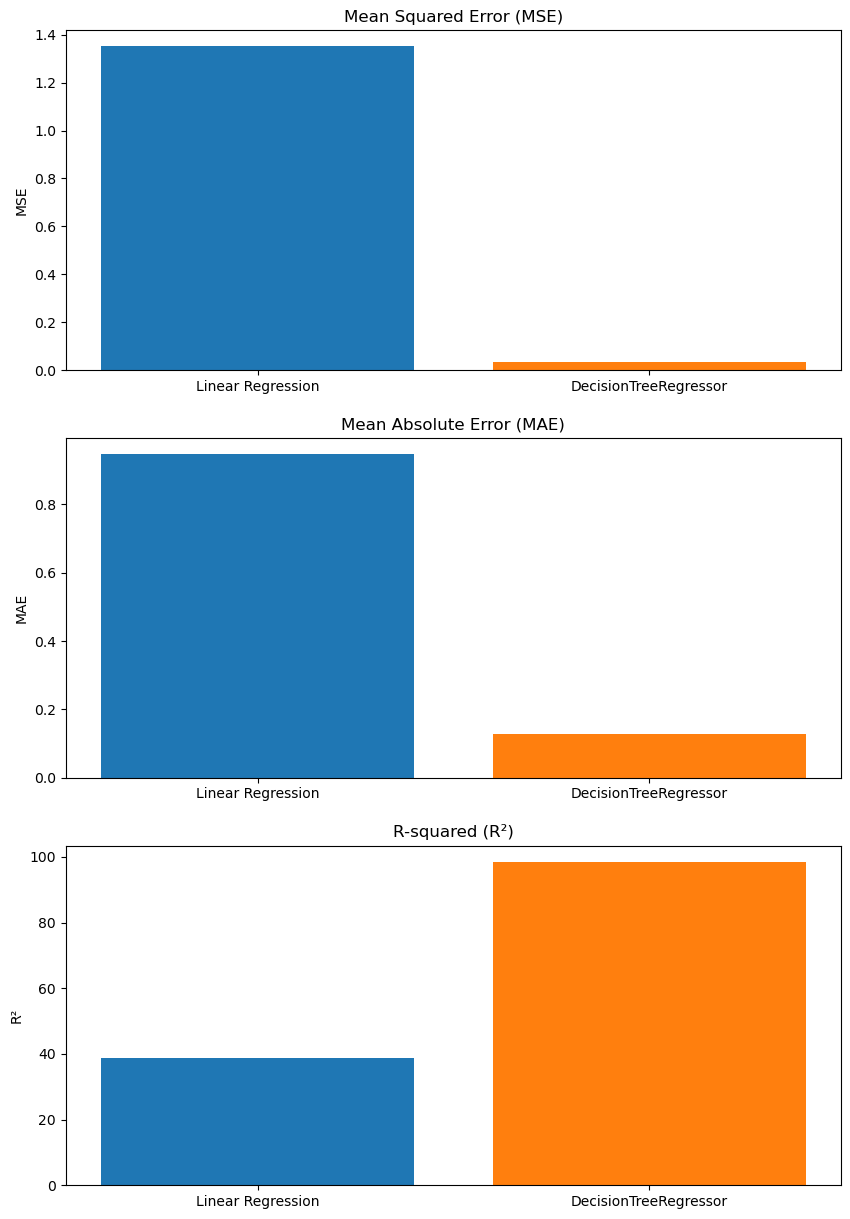

In [77]:
# Metrics for each model
mse = [1.3513671363937336,0.03259296659761921]
mae = [0.9468216116945907,0.1279587044757452]
r2 = [38.76864726126582,98.52319078894698]
   
labels = ['Linear Regression','DecisionTreeRegressor']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for each model

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  

# Plot MSE
plt.subplot(3, 1, 1)
plt.bar(labels, mse, color=colors)
plt.title("Mean Squared Error (MSE)")
plt.ylabel("MSE")

# Plot MAE
plt.subplot(3, 1, 2)
plt.bar(labels, mae, color=colors)
plt.title("Mean Absolute Error (MAE)")
plt.ylabel("MAE")

# Plot R-squared
plt.subplot(3, 1, 3)
plt.bar(labels, r2, color=colors)
plt.title("R-squared (R²)")
plt.ylabel("R²")
plt.show()